In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

/Users/sam/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [10]:
df = pd.read_csv('https://raw.githubusercontent.com/richard-alexander/Data_Science_Course/master/Seaborn/SubmittedData/BRS_Data.csv')

In [3]:
df.head()

,dapi_int,red_int,green_int
0,1111.00,822.37366,-174.51915
1,361.75,893.88135,341.99400
2,327.50,945.02050,269.15320
3,864.00,945.92365,184.98035
4,557.25,954.16740,454.11770


In [11]:
#df.loc[df['green_int']<0, 'green_int'] = 0
df['green_int'] = df['green_int'] - df['green_int'].min()

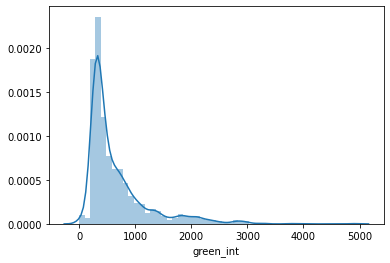

In [13]:
sns.distplot(df['green_int'])

In [29]:
df['LogGreen'] = np.log(1+df['green_int'])
df['LogRed'] = np.log(1+df['red_int'])
df['LogDAPI'] = np.log(1+df['dapi_int'])

(5.0, 8.5)

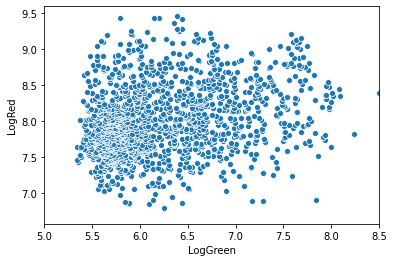

In [17]:
sns.scatterplot(data=df, x='LogGreen', y='LogRed')
plt.xlim([5,8.5])

In [21]:
df['DAPIHigh'] = df['dapi_int'] > 2.0 * np.median(df['dapi_int'])

(5.0, 8.5)

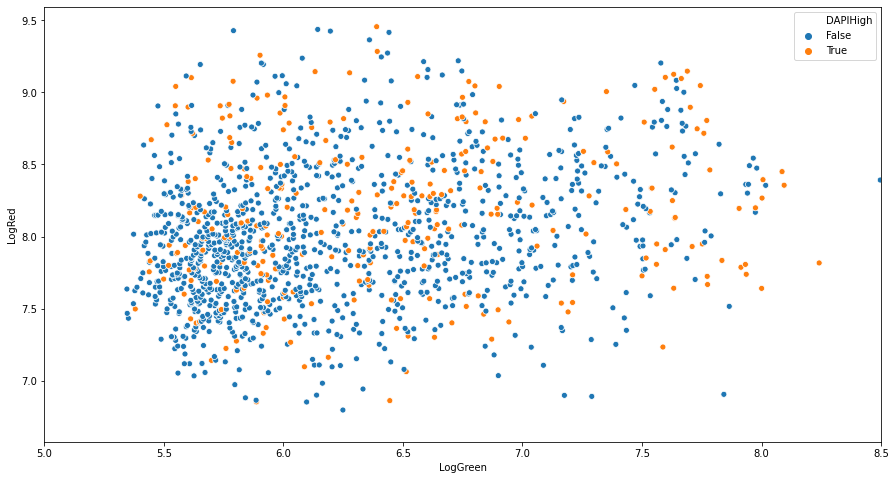

In [24]:
plt.figure(figsize=[15,8])
sns.scatterplot(data=df, x='LogGreen', y='LogRed', hue='DAPIHigh')
plt.xlim([5,8.5])

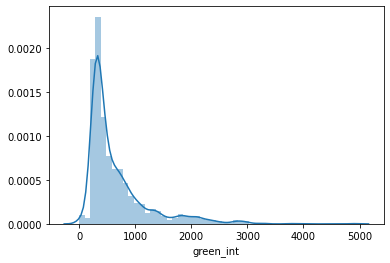

In [25]:
sns.distplot(df['green_int'])

In [26]:
df['GreenHigh'] = df['green_int'] > 1200

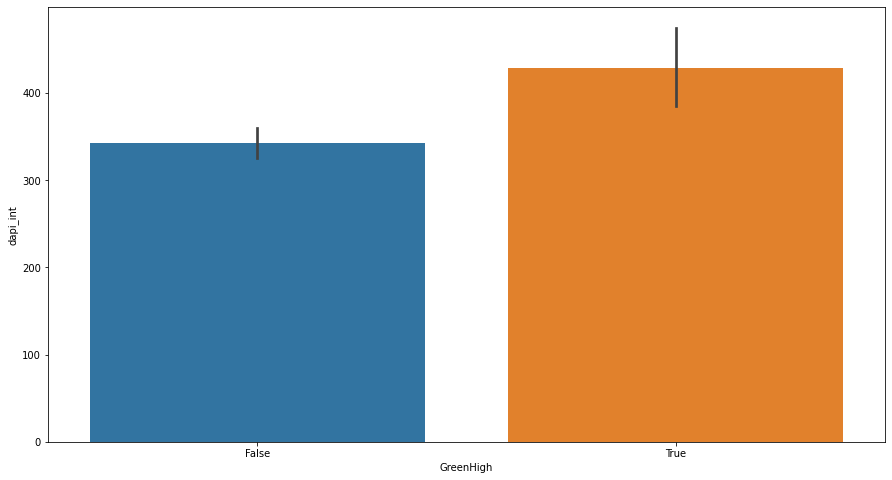

In [38]:
plt.figure(figsize=[15,8])
sns.barplot(data=df, x='GreenHigh', y='dapi_int')
#sns.swarmplot(data=df, x='GreenHigh', y='dapi_int', dodge=True)

In [34]:
import scipy.stats

In [35]:
scipy.stats.mannwhitneyu(df[df['GreenHigh']]['dapi_int'], df[~df['GreenHigh']]['dapi_int'])

MannwhitneyuResult(statistic=95060.5, pvalue=3.5675098511969415e-05)